In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#df = pd.read_csv('TextBlob_sentiment_analyzed_reviews.csv')
csv_file = '../data/TextBlob_sentiment_analyzed_reviews.csv'
df = pd.read_csv(csv_file)

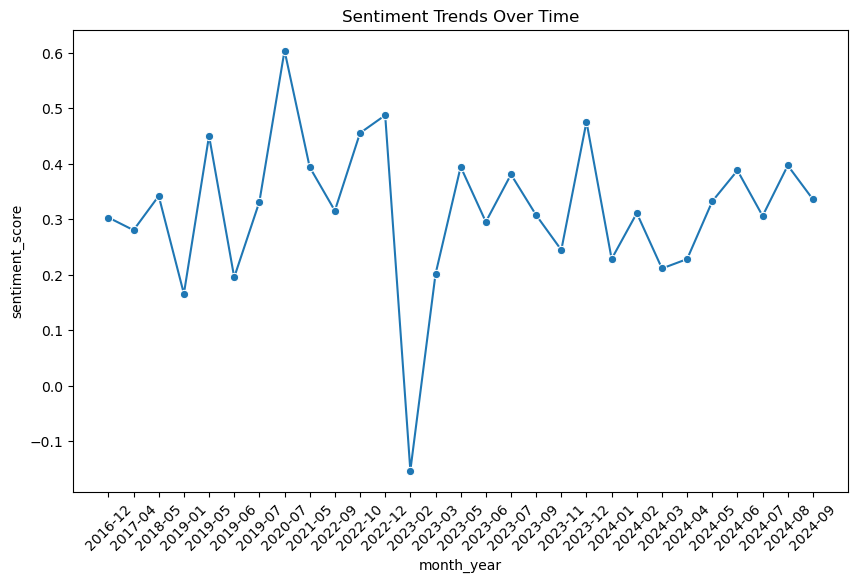

In [14]:
# 1. Ensure standardized date exists
df['standardized_date'] = pd.to_datetime(df['standardized_date'], errors='coerce')

# 2. Create month_year column
df['month_year'] = df['standardized_date'].dt.to_period('M')

# 3. Group by month_year and calculate average sentiment score
monthly_sentiment = df.groupby('month_year').agg({'sentiment_score': 'mean'}).reset_index()

# 4. Convert month_year to string
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].astype(str)

# 5. Plot the sentiment trend
plt.figure(figsize=(10,6))
sns.lineplot(x='month_year', y='sentiment_score', data=monthly_sentiment, marker='o')
plt.xticks(rotation=45)
plt.title('Sentiment Trends Over Time')
plt.savefig('../data/Sentiment Trends Over Time.png')
plt.show()

Correlation coefficient between sentiment score and star ratings: 0.55


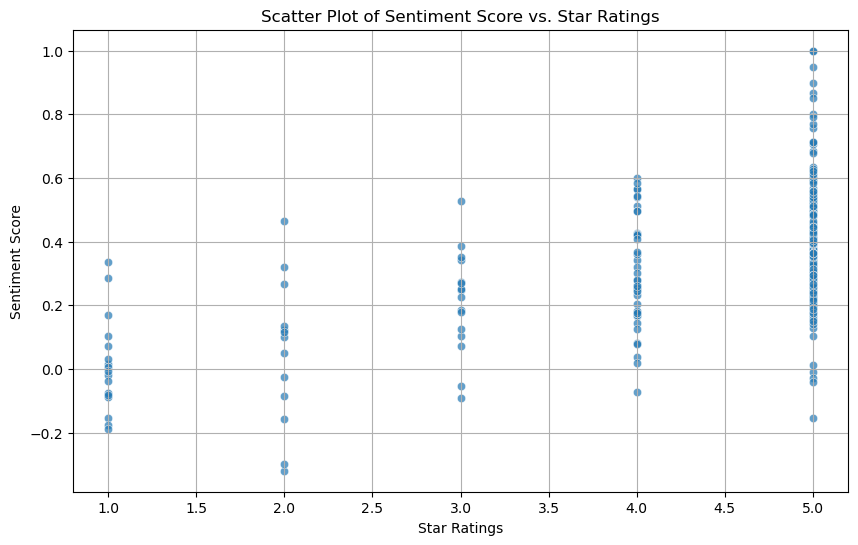

In [15]:
#Correlation between cleaned_rating and sentiment_score code.

# Step 1: Prepare the Data
# Ensure sentiment_score and star_rating are numeric and handle missing values
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')
df['cleaned_rating'] = pd.to_numeric(df['cleaned_rating'], errors='coerce')

# Drop rows with NaN values in either column
df = df.dropna(subset=['sentiment_score', 'cleaned_rating'])

# Step 2: Compute the Correlation
correlation = df['sentiment_score'].corr(df['cleaned_rating'])
print(f"Correlation coefficient between sentiment score and star ratings: {correlation:.2f}")

# Step 3: Visualize the Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cleaned_rating', y='sentiment_score', data=df, alpha=0.7)
plt.title('Scatter Plot of Sentiment Score vs. Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.savefig('../data/sentiment score vs Star rating correlation.png')
plt.show()

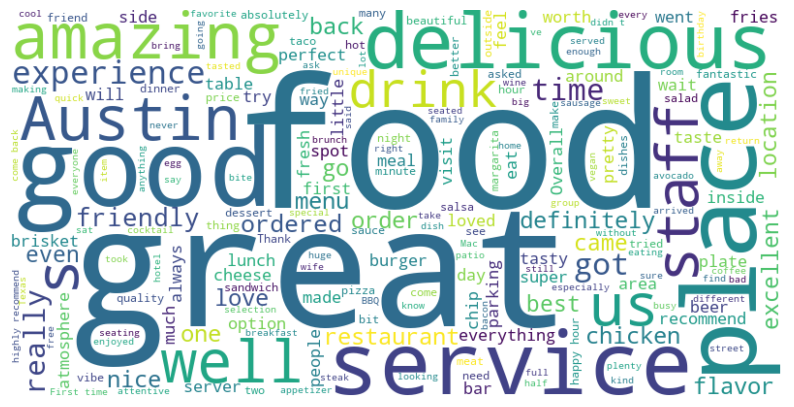

In [16]:
#wordcloud Code starts here
from wordcloud import WordCloud

# Combine all reviews into one string
all_reviews = ' '.join(df['Review Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../data/wordcloud.png')
plt.show()

In [12]:
# Filter the DataFrame for reviews with sentiment score > 0.5 and rating == 1
filtered_reviews = df[(df['sentiment_score'] < 0.0) & (df['cleaned_rating'] == 5)]

# Display the filtered reviews
filtered_reviews[['Review Text', 'sentiment_score', 'cleaned_rating']]

,Review Text,sentiment_score,cleaned_rating
121,This was a really cute place but the service w...,-0.010714,5
153,The salad bar is extraordinary with a huge sel...,-0.027778,5
170,"Popped in for a late lunch one Saturday, the p...",-0.041429,5
233,Pizza was very tasty. Crust was perfectly thi...,-0.153333,5


In [13]:
df.iloc[233].to_dict()

{'Review Text': 'Pizza was very tasty.  Crust was perfectly thin and crispy. Had Jamaican Pizza with jerk chicken and jalapeños, which I could have done with less. No inside seating but does have picnic tables. 18 bucks for a 10 in.. so be ready for that.',
 'standardized_date': Timestamp('2023-02-12 00:00:00'),
 'cleaned_rating': 5,
 'Restaurant': 'East Side Pies',
 'Address': '1401 Rosewood Ave, Austin, TX 78702, USA',
 'sentiment_score': -0.1533333333333333,
 'sentiment': 'Negative',
 'month_year': Period('2023-02', 'M')}